## Observations and Insights 

##### Obeservations

   Out of the four drugs analyzed, Capomulin and Ramicane are the most effective when it comes to decreasing the size of the tumor. Ceftamin and Infubinol are the least effective of the drugs analyzed. The top two drugs should be further analyzed and the other two should be shelved for the time being, giving more time and energy to perfecting something that is already proven to show postive results.
      
   While Capomulin seems to be the current best option out of the drugs analyzed, mouse i738 showed tumor shrinkage followed by growth. Capomulin should continued to be studied for its positive results, but should also be very closely monitored for possible negative side effects or signs of remission.   
      
   There is a strong postitive correlation between the weight of the mouse and the size of the tumor. I believe the mice would do well if kept on a healthy diet with plenty of exercise. The healthy weight seems to have a positive effect of the size of the tumor.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer' , on= 'Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mouse_group = combined_df.groupby ('Mouse ID')
mouse_count = mouse_group['Mouse ID'].count()
mouse_count

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
index_df = combined_df.set_index('Mouse ID')
index_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.
mouse_group_2 = clean_df.groupby('Mouse ID')
mouse_count_2 = mouse_group['Mouse ID'].count()
mouse_count

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_regimen = clean_df.groupby('Drug Regimen')
regimen_mean = grouped_regimen['Tumor Volume (mm3)'].mean() 
regimen_median = grouped_regimen['Tumor Volume (mm3)'].median()
regimen_variance = grouped_regimen['Tumor Volume (mm3)'].var()
regimen_sd = grouped_regimen['Tumor Volume (mm3)'].std() 
regimen_SEM = grouped_regimen['Tumor Volume (mm3)'].sem()
regimen_count = grouped_regimen['Tumor Volume (mm3)'].count()

regimen_summary = pd.DataFrame({'Mean': regimen_mean,
                                'Median': regimen_median,
                                'Variance': regimen_variance,
                                'Standard Deviation': regimen_sd,
                                'SEM': regimen_SEM,
                                'Count': regimen_count})

regimen_summary


,Mean,Median,Variance,Standard Deviation,SEM,Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041,160
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

grouped_regimen.describe()

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          160.0  10.831250  7.283325  1.0   5.00   8.0  21.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          160.0  27.050000  ...          56.259803  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                160.0  0.981250  1.084319  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

## Bar and Pie Charts

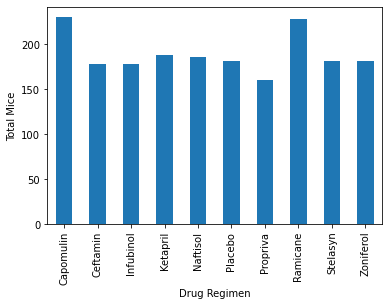

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_mice_treated = clean_df.groupby('Drug Regimen')
total_mice_count = total_mice_treated['Drug Regimen'].count()

mouse_chart_1 = total_mice_count.plot (kind='bar')
mouse_chart_1.set_ylabel ('Total Mice');

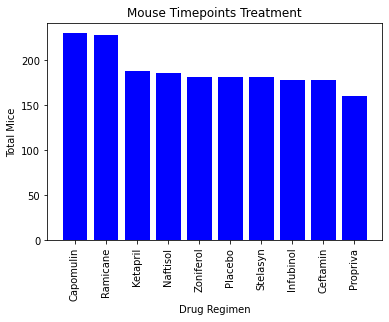

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

total_mice = clean_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(total_mice))

plt.bar(x_axis, total_mice, color='b', align='center')
timepoints = [name for name in x_axis]
plt.xticks(timepoints, total_mice.index.values)
plt.xticks(rotation=90)
plt.title('Mouse Timepoints Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice');

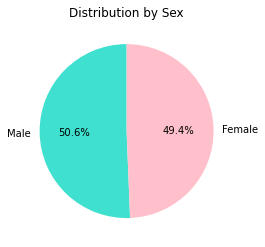

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_sex = clean_df['Sex'].value_counts()
mouse_chart_2 = mouse_sex.plot.pie(autopct='%1.1f%%', startangle=90, title='Distribution by Sex', colors = ['turquoise', 'pink'])
mouse_chart_2.set_ylabel('');

Male      958
Female    934
Name: Sex, dtype: int64

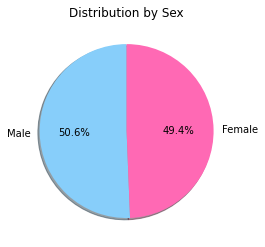

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex = clean_df['Sex'].value_counts()

plt.title('Distribution by Sex')
labels = ['Male', 'Female']
colors = ['lightskyblue', 'hotpink']
plt.pie(mouse_sex, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)

mouse_sex

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max())
greatest_timepoint.rename(columns = {'Timepoint' : 'Max TP'}, inplace = True)

greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_tp_merged = pd.merge(clean_df, greatest_timepoint, how='outer', on='Mouse ID')

greatest_tp_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max TP
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2,45
1888,z969,Naftisol,Male,9,30,30,65.841013,3,45
1889,z969,Naftisol,Male,9,30,35,69.176246,4,45
1890,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [76]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment:
    max_treatment = greatest_tp_merged.loc[greatest_tp_merged['Drug Regimen'] == treatment]
    final_volume = max_treatment.loc[max_treatment['Timepoint'] == max_treatment['Max TP']]
    tumor_size = final_volume['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_size)
    
    # add subset 
quartiles = tumor_size.quantile([.25, .5, .75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
interquartile_range = upper_quartile-lower_quartile
print(f'IQR for {treatment}: {interquartile_range}')

lower = lower_quartile - (1.5*interquartile_range)
upper = upper_quartile + (1.5*interquartile_range)
print(f'Lower Bound for {treatment}: {lower}')
print(f'Upper Bound for {treatment}: {upper}')
    
    # Determine outliers using upper and lower bounds
outliers_count = (tumor_size.loc[(final_volume['Tumor Volume (mm3)'] >= upper) | (final_volume['Tumor Volume (mm3)'] <= lower)]).count()
print(f'Number of {treatment} outliers: {outliers_count}')
    

IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


([<matplotlib.axis.XTick at 0x7f8fd80a9760>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

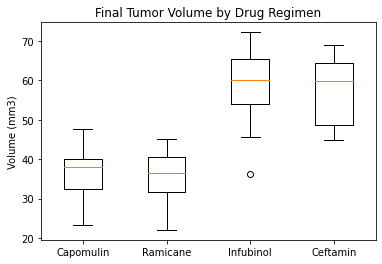

In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data)
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Volume (mm3)')
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

Text(0.5, 1.0, 'Capmulin Mouse i738 Tumor Size')

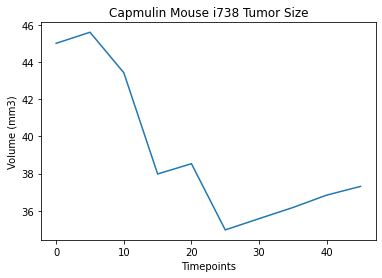

In [92]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_i738 = greatest_tp_merged.loc[greatest_tp_merged['Mouse ID'] == 'i738']
plt.plot(mouse_i738['Timepoint'], mouse_i738['Tumor Volume (mm3)'])
plt.xlabel('Timepoints')
plt.ylabel('Volume (mm3)')
plt.title('Capmulin Mouse i738 Tumor Size')

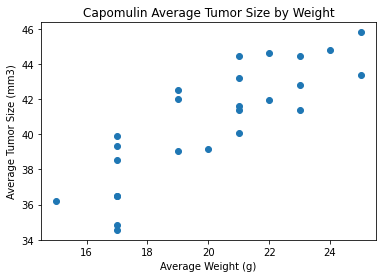

In [97]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

tumor_average = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())

weight_average = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Weight (g)'].mean())

capomulin_average = pd.merge(tumor_average, weight_average, on="Mouse ID")
capomulin_average

x = capomulin_average['Weight (g)']
y = capomulin_average['Tumor Volume (mm3)']

plt.scatter(x, y, marker='o')
plt.title('Capomulin Average Tumor Size by Weight')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Size (mm3)')

plt.show()

## Correlation and Regression

Correlation between tumor volume and mouse weight is 0.84. 


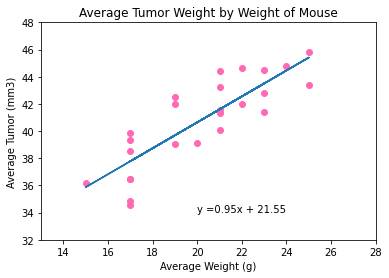

In [109]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x, y)
print(f'Correlation between tumor volume and mouse weight is {round(correlation[0],2)}. ')
(corandreg_slope, corandreg_int, corandreg_r, corandreg_p, corandreg_std_err) = st.linregress(x, y)
corandreg_fit = corandreg_slope * x + corandreg_int
line_eq = 'y =' + str(round(corandreg_slope,2)) + 'x + ' +str(round(corandreg_int,2))
plt.scatter(x, y, marker='o', color='hotpink')
plt.plot(x,corandreg_fit, corandreg_r)
plt.annotate(line_eq, (20,34), fontsize=10, color='black')
plt.ylim(32,48)
plt.xlim(13,28)
plt.title('Average Tumor Weight by Weight of Mouse')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor (mm3)')

plt.show()